# 1. Maintain same Directory for the file

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\nmnko\\Documents\\vscode-projects\\Global-Electric-Vehicle-sales-trends-from-2010-2024\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\nmnko\\Documents\\vscode-projects\\Global-Electric-Vehicle-sales-trends-from-2010-2024'

# 2. EDA & Visualisations

Load cleaned data set csv

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px

1. Check data set vehicles representation per vehicle mode

In [5]:
df = pd.read_csv ("cleaned-file\\cleaned.csv")
vehicle_mode_count = df['mode'].value_counts().reset_index()
vehicle_mode_count.columns = ['mode', 'count']
print(vehicle_mode_count)

     mode  count
0    Cars   4706
1   Buses   2696
2    Vans   2568
3  Trucks   1766
4      EV    918


Showing the column headers again for use in visualisation further down

In [22]:
df.head()
df.tail()

,region,category,parameter,mode,powertrain,year,unit,value
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,55.0
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,31.0
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9400000.0
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,15000000.0
12653,World,Projection-STEPS,EV stock share,Trucks,EV,2035,percent,9.0


Data descptive statistics

In [6]:

df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
region,12654,54,World,1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,12654,3,Historical,9174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameter,12654,8,EV stock,3470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mode,12654,5,Cars,4706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
powertrain,12654,6,EV,4894,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,12654.0,NaN,NaN,NaN,2019.822112,5.476494,2010.0,2016.0,2020.0,2022.0,2035.0
unit,12654,6,Vehicles,6842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value,12654.0,NaN,NaN,NaN,427374.173498,6860498.318587,0.000001,2.0,130.0,5500.0,440000000.0


Visualisation of data set representation per vehicle mode

C:\Users\nmnko\AppData\Local\Temp\ipykernel_32872\308294570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="count", x="mode", data=vehicle_mode_count, palette=sns.color_palette("pastel"))
C:\Users\nmnko\AppData\Local\Temp\ipykernel_32872\308294570.py:2: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(y="count", x="mode", data=vehicle_mode_count, palette=sns.color_palette("pastel"))


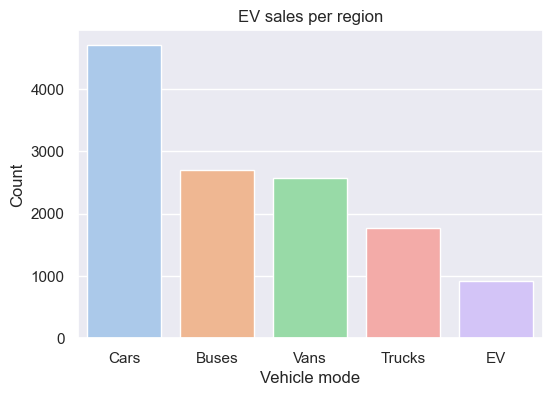

In [16]:
plt.figure(figsize=(6, 4))
sns.barplot(y="count", x="mode", data=vehicle_mode_count, palette=sns.color_palette("pastel"))
plt.title("EV sales per region")
plt.xlabel("Vehicle mode")
plt.ylabel("Count")
plt.show()

2. Check data set vehicles representation per world region

In [8]:
df = pd.read_csv ("cleaned-file\\cleaned.csv")
vehicle_count_per_region = df['region'].value_counts().reset_index()
vehicle_count_per_region.columns = ['region', 'count']
print(vehicle_count_per_region)

                  region  count
0                  World   1250
1                 Europe   1234
2                  China   1138
3      Rest of the world    954
4                    USA    737
5                  India    702
6                   EU27    424
7            Netherlands    358
8                 France    358
9         United Kingdom    345
10               Denmark    319
11               Belgium    310
12               Germany    298
13                Norway    270
14                Sweden    269
15                 Japan    260
16           Switzerland    245
17                 Spain    245
18                Canada    240
19                 Italy    230
20                 Korea    209
21               Finland    200
22                Poland    194
23              Portugal    189
24           New Zealand    185
25                Brazil    183
26                Israel    148
27               Austria    116
28               Iceland    115
29                 Chile    103
30      

Visualise vehicle count per region

C:\Users\nmnko\AppData\Local\Temp\ipykernel_32872\2632216788.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="count", x="region", data=vehicle_count_per_region, palette=sns.color_palette("pastel"))
C:\Users\nmnko\AppData\Local\Temp\ipykernel_32872\2632216788.py:2: UserWarning: 
The palette list has fewer values (10) than needed (54) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y="count", x="region", data=vehicle_count_per_region, palette=sns.color_palette("pastel"))


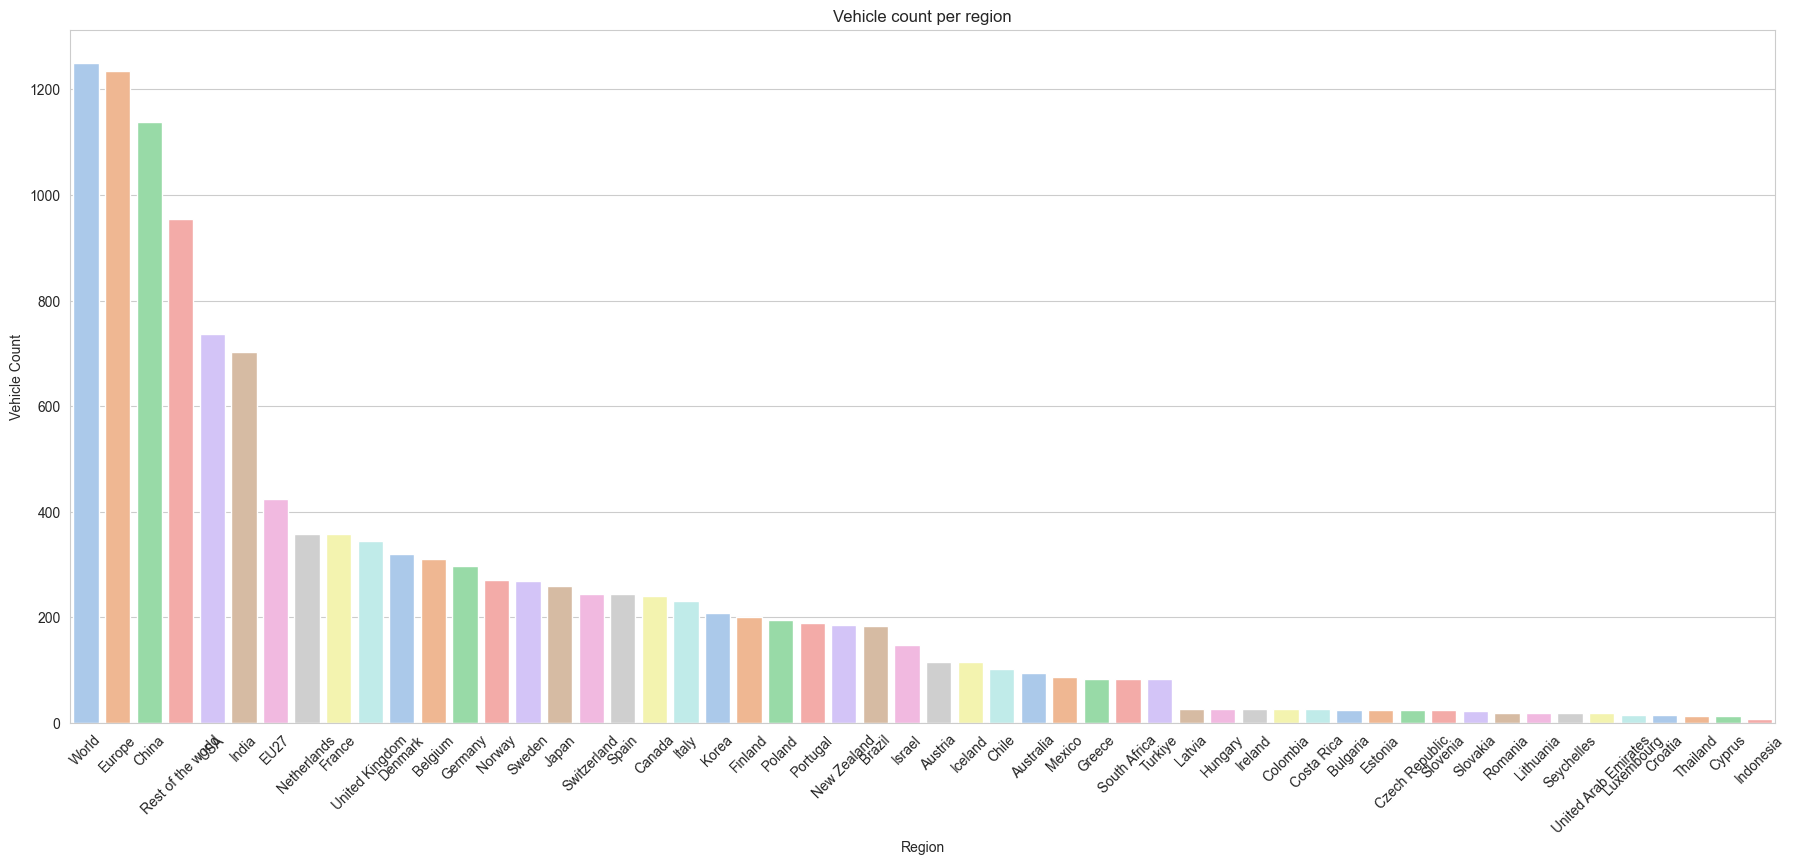

In [9]:
plt.figure(figsize=(22, 9))
sns.barplot(y="count", x="region", data=vehicle_count_per_region, palette=sns.color_palette("pastel"))
plt.title("Vehicle count per region")
plt.xlabel("Region")
plt.ylabel("Vehicle Count")
plt.xticks(rotation=45)
plt.show()

After the vehicle count per region above, below is a Scatter plot showing value spent per region (region against the numerical variable of value)

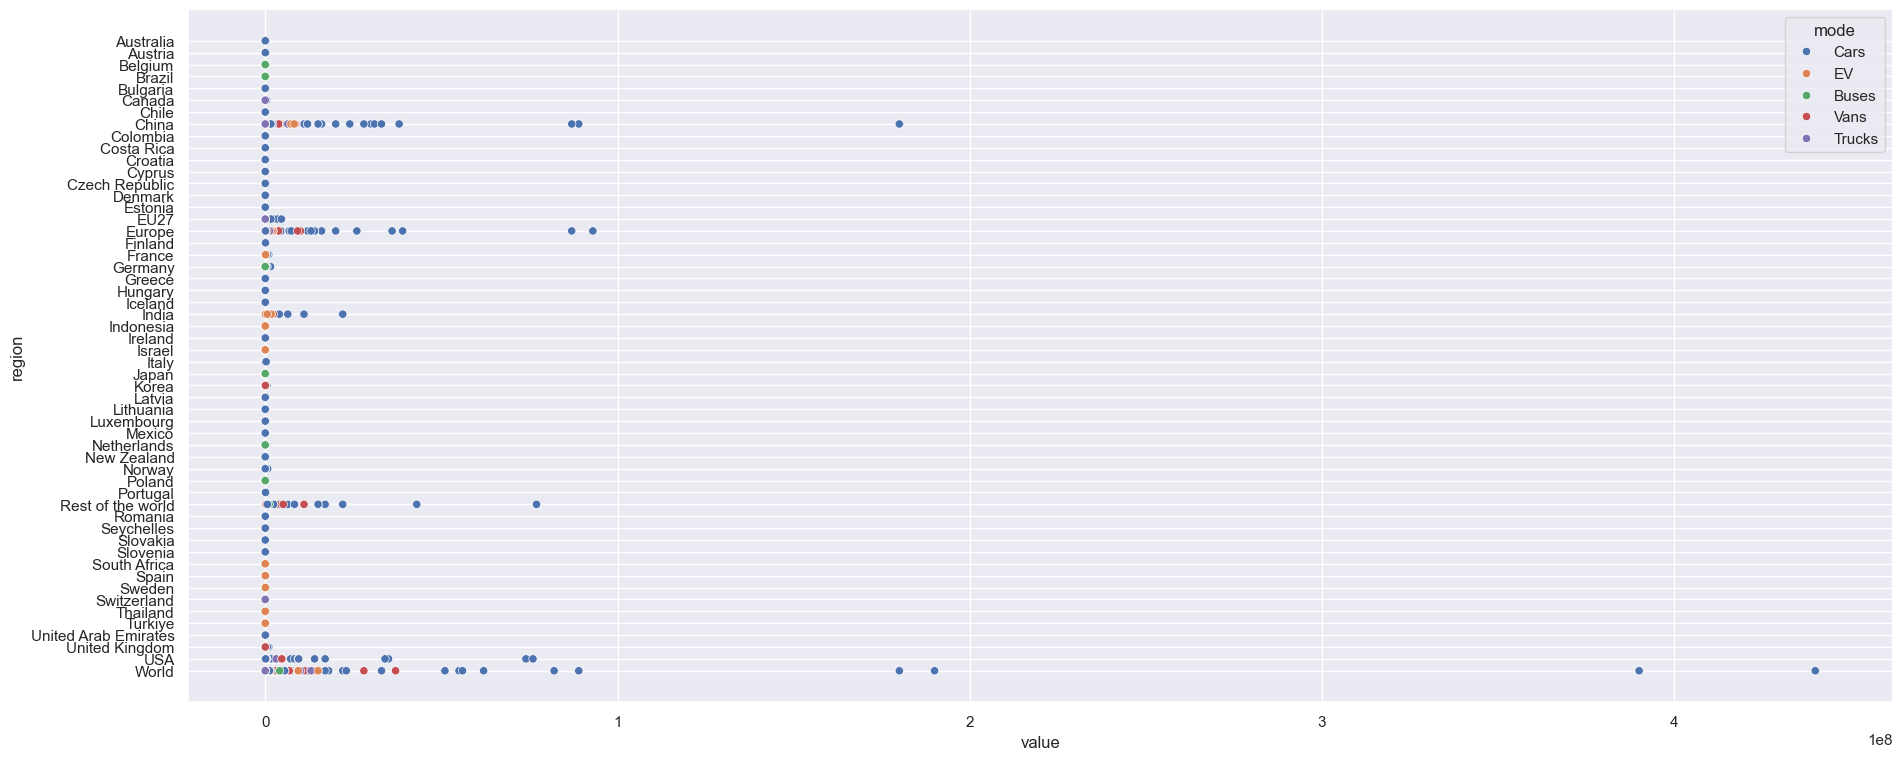

In [19]:
fig, axes = plt.subplots(figsize=(22,9))
sns.scatterplot(data=df, x='value', y='region', hue='mode') 
plt.show()

Visualise vehicles per region using the pair plot 

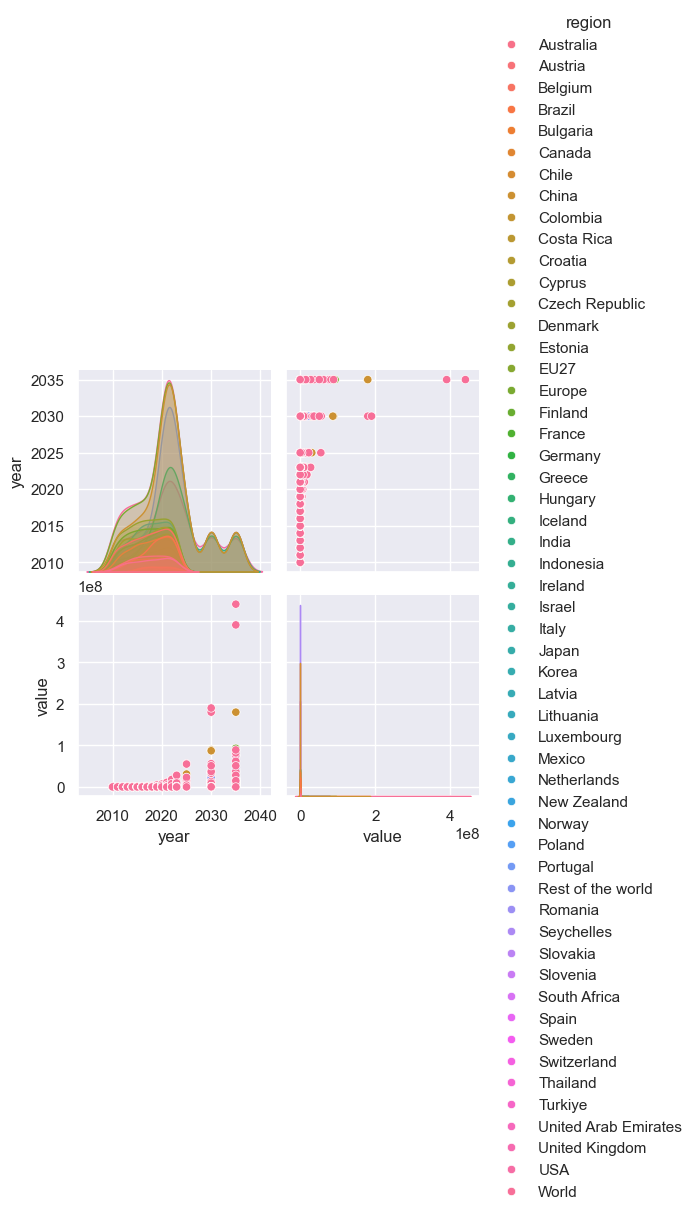

In [11]:
# visualising the pair plot for the data (Ref:https://www.kaggle.com/code/pranavkumarmehta/global-ev-sales-2010-2024-analysis-eda#To-visualixe-the-pairplot-of-data)
sns.set(rc = {"figure.figsize" : (22,9)})
sns.pairplot(df, hue = "region")
plt.show()

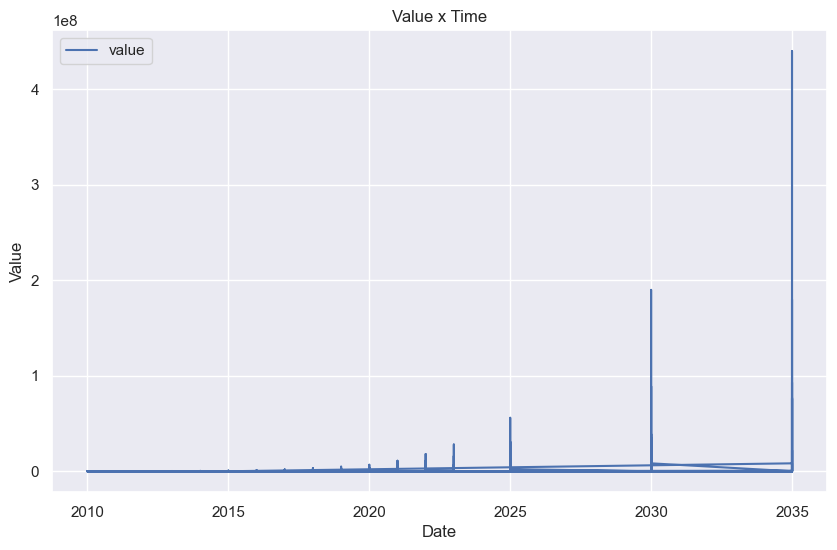

In [13]:
df.plot(kind='line',y='value',x='year',figsize=(10,6),title='Value x Time',xlabel='Date',ylabel='Value')
       
plt.show()

Visualise the value category projection over the years

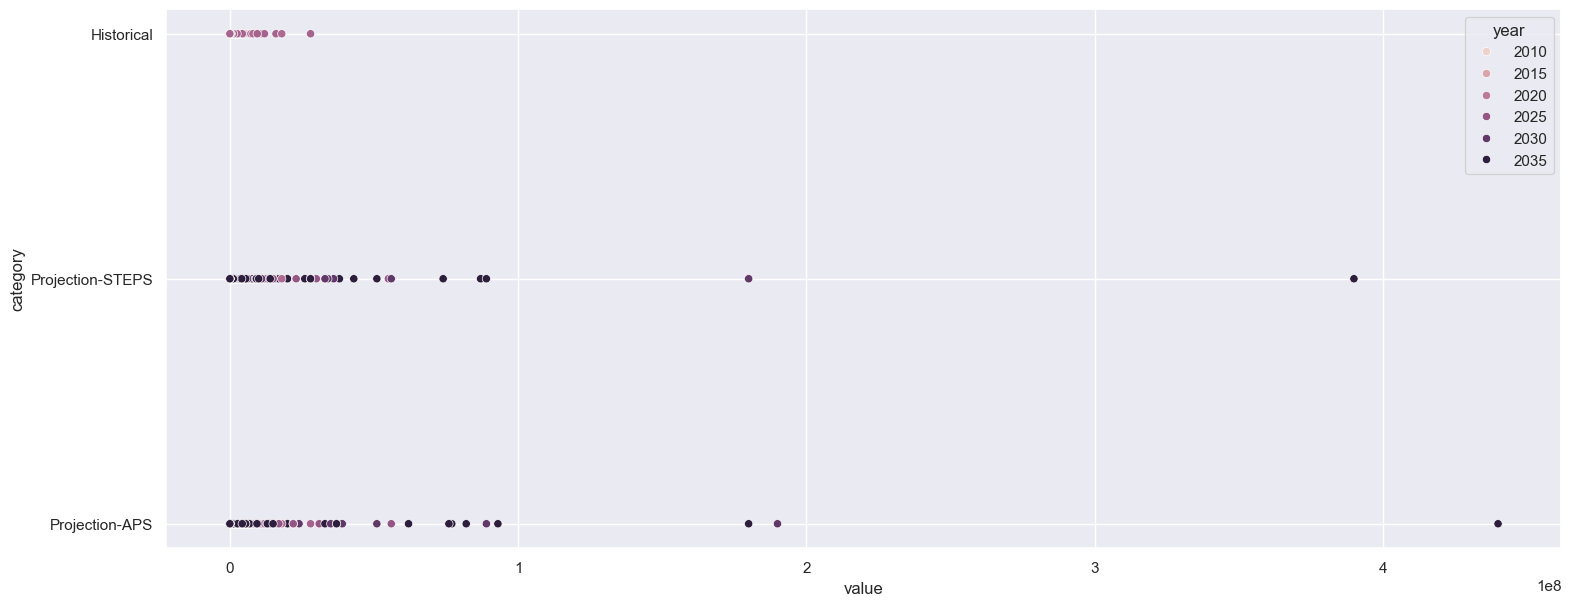

In [21]:
fig, axes = plt.subplots(figsize=(18,7))
sns.scatterplot(data=df, x='value', y='category', hue='year') 
plt.show()

On the above scatter plot 

Box plot to detect outliers in value variable

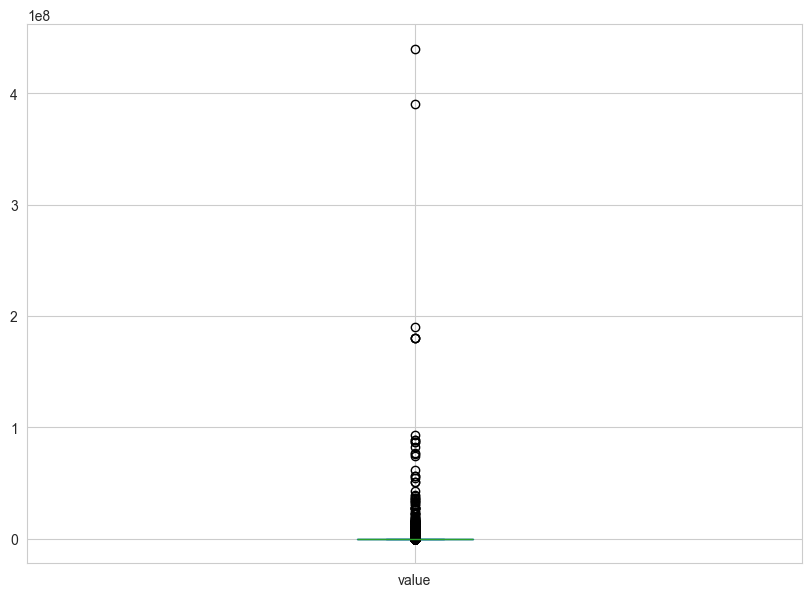

In [ ]:
df.plot(kind='box',y=['value'],figsize=(10,7))
plt.show()

The Box plot above shows that most of the data is an out lier and the median is around 0.2.

C:\Users\nmnko\AppData\Local\Temp\ipykernel_8200\3858982309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="unit", y="value", data=df, palette="coolwarm")


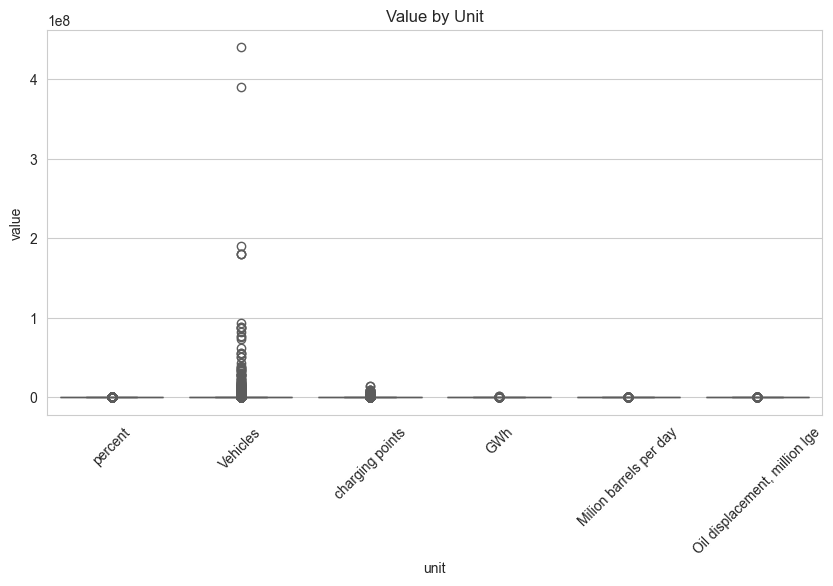

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="unit", y="value", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Value by Unit")
plt.show()

Box plot to detect outliers in the data set

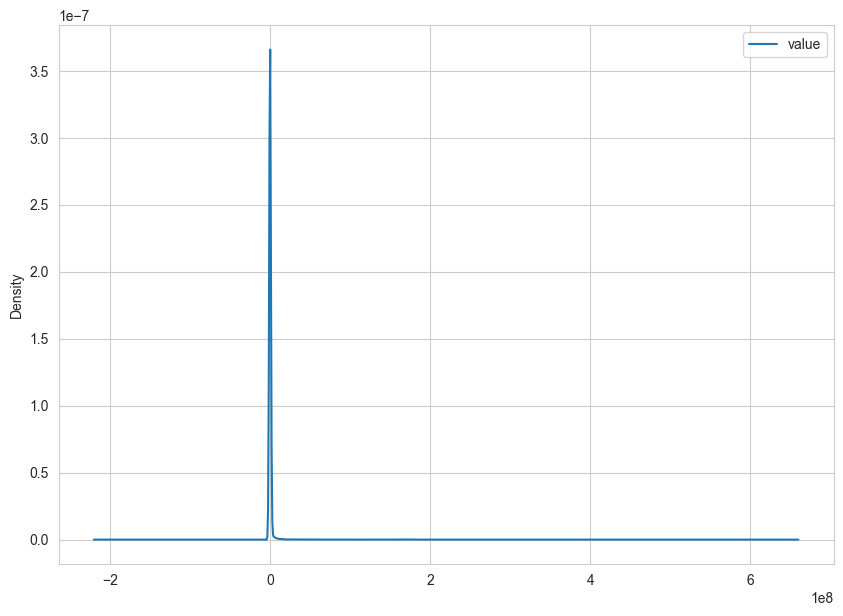

In [ ]:
df.plot(kind='kde',y=['value'],figsize=(10,7))
plt.show()

## Bar plots to show other categorical variables against the count variable

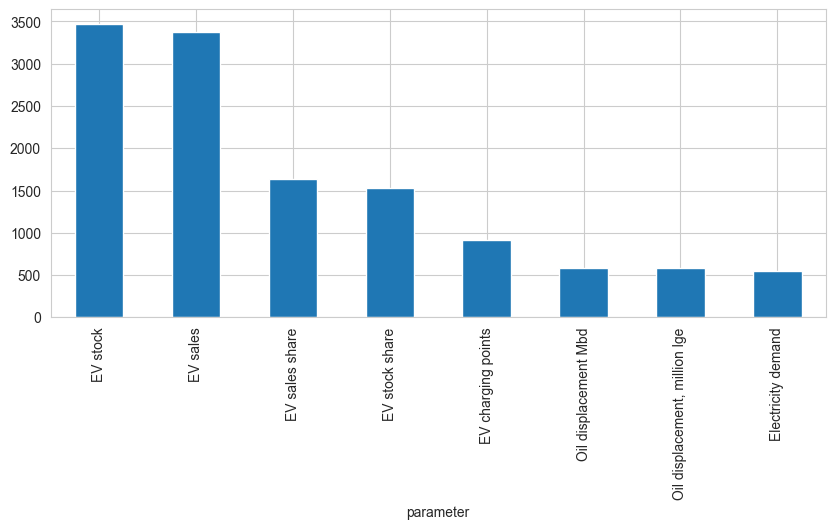

In [ ]:
df.value_counts('parameter').plot(kind='bar',figsize=(10,4))
plt.show()

Bar plot to show other categorical variables against the count variable

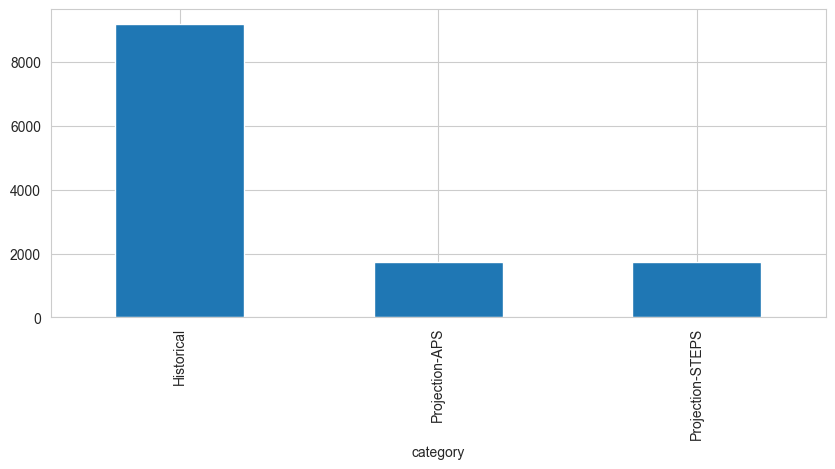

In [ ]:
df.value_counts('category').plot(kind='bar',figsize=(10,4))
plt.show()

Visualisation insights and evaluations